In [7]:
import altair as alt
import numpy as np
import pandas as pd

df = pd.read_csv('~/development/greatwall/data/data_clean.csv')
df['year'] = df.ADate.str.slice(0,4)

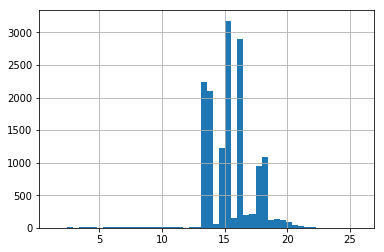

In [8]:
# Plot Price Histogram:

df[df['price_clean'] != 0].price_clean.apply(np.log).hist(bins = 50)

In [9]:
# Get total price per year

df.groupby(['year'])['price_clean'].agg(['mean', 'sum', 'count']).tail()

,mean,sum,count
year,,,
2014,9.143122e+07,1.508615e+10,165
2015,1.441281e+08,4.900356e+10,340
2016,1.725841e+08,4.504445e+10,261
2017,2.527477e+08,1.584728e+11,627
2018,3.118749e+08,2.635343e+11,845


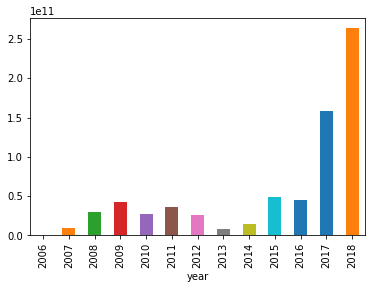

In [10]:
## Get total issuance by Year.

df.groupby(['year'])['price_clean'].sum().plot.bar()

In [11]:
# Issuance by Province

npl_by_city = pd.DataFrame(df[df['year'] == '2018'].groupby(['CityName'])['price_clean'].sum())

npl_by_city.sort_values(by = 'price_clean', ascending = False).head()

,price_clean
CityName,
北京,1.570759e+11
广西,1.954609e+10
云南,1.632147e+10
辽宁,1.488219e+10
四川,1.000652e+10


In [100]:
# Issuance By Sector

npl_by_sector = pd.DataFrame(df[df['year'] == '2018'].groupby(['TradeName'])['price_clean'].sum())

npl_by_sector.sort_values(by = 'price_clean', ascending = False).head()

,price_clean
TradeName,
无,1.704118e+11
其他,4.502538e+10
房地产业,2.532575e+10
批发和零售业,1.022251e+10
制造业\r\n,6.247131e+09


In [2]:
# Issuance by region

# -*- coding: utf-8 -*-

def get_region(input_string):
    """Map province to region"""
    rust_belt = '天津|河北|陕西|黑龙江|吉林|山西|内蒙古'
    middle = '四川|湖南|江西|重庆|河南|湖北|安徽'
    coast = '北京|山东|福建|海南|江苏|上海|广东|浙江'
    west = '广西|云南|贵州|甘肃|新疆|青海|宁夏'

    if input_string in rust_belt:
        region = 'Rust Belt'
    elif input_string in middle:
        region = 'Populous Middle'
    elif input_string in coast:
        region = "Prosperous Coast"
    elif input_string in west:
        region = "Autonomous West"
    else:
        region = "NA"

    return region

In [18]:
df['CityName'].map(get_region)

TypeError: 'in <string>' requires string as left operand, not float